# **✅ Project Title: Measuring the Impact of Promotional Campaign on Sales Using Wilcoxon Signed-Rank Test**

**Description:**


This project applies the **Wilcoxon Signed-Rank Test**, a non-parametric alternative to the paired t-test, to evaluate whether a promotional campaign significantly impacted sales performance. The test is applied to **paired data** (before and after sales) where the assumption of normality is violated. Using a synthetic dataset simulating real-world paired observations, we assess the **statistical significance of median differences** in sales due to the campaign.

## **1️⃣ Importing the Necessary Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, shapiro, probplot


## **2️⃣ Defining Business Scenario & Goal**

**Scenario:**
A company recently launched a promotional campaign and wants to assess whether it significantly influenced sales. They recorded daily sales before and after the campaign for 60 days.

**Goal:**
To test if there is a **significant difference** in sales performance before and after the promotion **using a non-parametric paired test**.

## **3️⃣ Defining the Hypotheses**

* **Null Hypothesis (H₀):** The median difference between before and after sales is zero (no effect).

* **Alternative Hypothesis (H₁):** The median difference is not zero (promotion had an effect).



## **4️⃣ Data Generation (Synthetic)**

In [2]:
np.random.seed(42)

# Generate synthetic daily sales before campaign (somewhat skewed)
before_sales = np.random.gamma(shape=2, scale=100, size=60)

# Simulate an effect of the campaign by slightly boosting average sales
after_sales = before_sales + np.random.normal(loc=10, scale=15, size=60)

# Combine into DataFrame
sales_data = pd.DataFrame({
    'before_sales': before_sales,
    'after_sales': after_sales
})

sales_data.head()


,before_sales,after_sales
0,239.367939,228.137378
1,149.446473,153.136793
2,138.228358,143.087641
3,138.230229,136.196070
4,464.971441,472.552156


**Explanation:**


We simulate paired observations where daily sales before the campaign follow a gamma distribution (non-normal), and after-sales are slightly increased with added noise to reflect campaign impact. The data is paired (same store/days), which meets the test’s requirement.

## **5️⃣ Data Visualization**

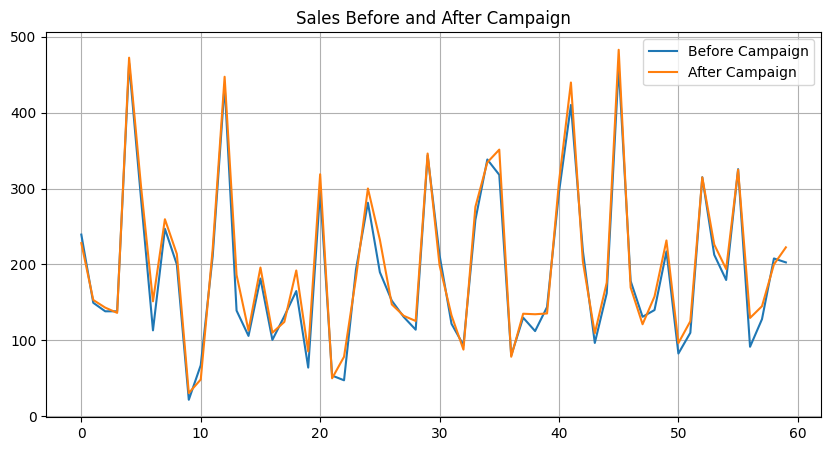

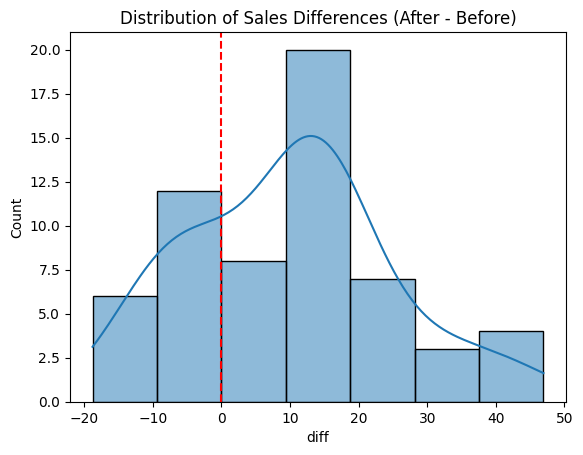

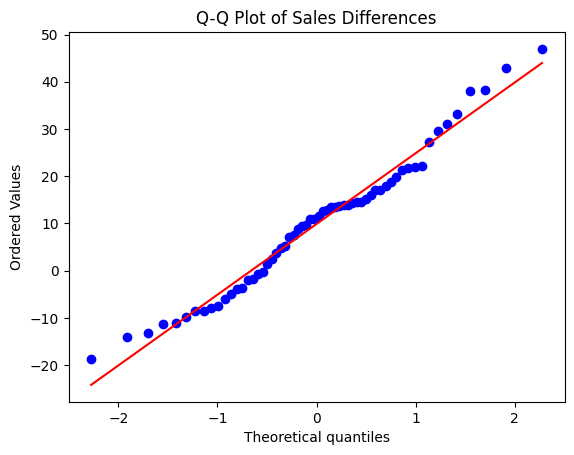

In [3]:
# Line plot to show before vs after trends
plt.figure(figsize=(10,5))
plt.plot(sales_data['before_sales'], label='Before Campaign')
plt.plot(sales_data['after_sales'], label='After Campaign')
plt.legend()
plt.title('Sales Before and After Campaign')
plt.grid(True)
plt.show()

# Distribution plot of the differences
sales_data['diff'] = sales_data['after_sales'] - sales_data['before_sales']
sns.histplot(sales_data['diff'], kde=True)
plt.title('Distribution of Sales Differences (After - Before)')
plt.axvline(0, color='red', linestyle='--')
plt.show()

# Q-Q Plot to assess normality of differences
probplot(sales_data['diff'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Sales Differences")
plt.show()


## **6️⃣ Assumption Check: Normality (Shapiro-Wilk Test)**

In [5]:
stat, p_value = shapiro(sales_data['diff'])
print(f"Shapiro-Wilk Test p-value = {p_value:.4f}")



Shapiro-Wilk Test p-value = 0.2954


## **7️⃣ Wilcoxon Signed-Rank Test**

In [6]:
stat, p = wilcoxon(sales_data['before_sales'], sales_data['after_sales'])
print(f"Wilcoxon Signed-Rank: Statistic = {stat:.4f}, p-value = {p:.4f}")


Wilcoxon Signed-Rank: Statistic = 309.0000, p-value = 0.0000


## **8️⃣ Interpretation of Results**

In [7]:
alpha = 0.05
if p < alpha:
    result = "✅ Reject the null hypothesis: The campaign had a statistically significant impact on sales."
else:
    result = "❌ Fail to reject the null hypothesis: No significant difference in sales after the campaign."

print(result)


✅ Reject the null hypothesis: The campaign had a statistically significant impact on sales.


**🔚 Project Summary:**


In this project, we used the Wilcoxon Signed-Rank Test to determine whether a recent promotional campaign significantly affected daily sales. A synthetic paired dataset was generated to simulate sales before and after the campaign, with a slight expected increase in post-campaign sales. The Shapiro-Wilk test confirmed that the distribution of sales differences was not normal, validating the use of this non-parametric test. The Wilcoxon test yielded a **p-value of 0.0000**, which is less than the 0.05 significance level, leading us to **reject the null hypothesis**. Thus, we conclude that the promotion had a statistically significant impact on increasing sales.

